# Add Interactivity: User Input and Callbacks
## Objectives
After completing the lab, you will be able to:

- Work with Dash Callbacks

## Dataset Used
[Airline Reporting Carrier On-Time Performance](https://developer.ibm.com/exchanges/data/all/airline/?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) dataset from [Data Asset eXchange](https://developer.ibm.com/exchanges/data/?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

## About Skills Network Cloud IDE
This Skills Network Labs Cloud IDE (Integrated Development Environment) provides a hands-on environment in your web browser for completing the course and project-related labs. It utilizes Theia, an open-source IDE platform that can be run on a desktop or on the cloud.
So far in the course, you have been using Jupyter Notebooks to run your Python code. This IDE provides an alternative for editing and running your Python code. In this lab, you will be using this alternative Python runtime to create and launch your Dash applications.

### Important Notice about this lab environment<br>
Please be aware that sessions for this lab environment are not persisted. When you launch the Cloud IDE, you are presented with a ‘dedicated computer on the cloud’ exclusively for you. This is available to you as long as you are actively working on the labs.

Once you close your session or it is timed out due to inactivity, you are logged off, and this ‘dedicated computer on the cloud’ is deleted along with any files you may have created, downloaded or installed. The next time you launch this lab, a new environment will be created for you.

If you finish only part of the lab and return later, you may have to start from the beginning. So, it is a good idea to plan your time accordingly and finish your labs in a single session.

## Let's start creating dash application
### Theme
Extract the average monthly arrival delay time and see how it changes over the year. The year range is from 2010 to 2020.

### Expected Output
Below is the expected result from the lab. Our dashboard application consists of three components:

- Title of the application
- Component to enter input year
- Chart conveying the average monthly arrival delay

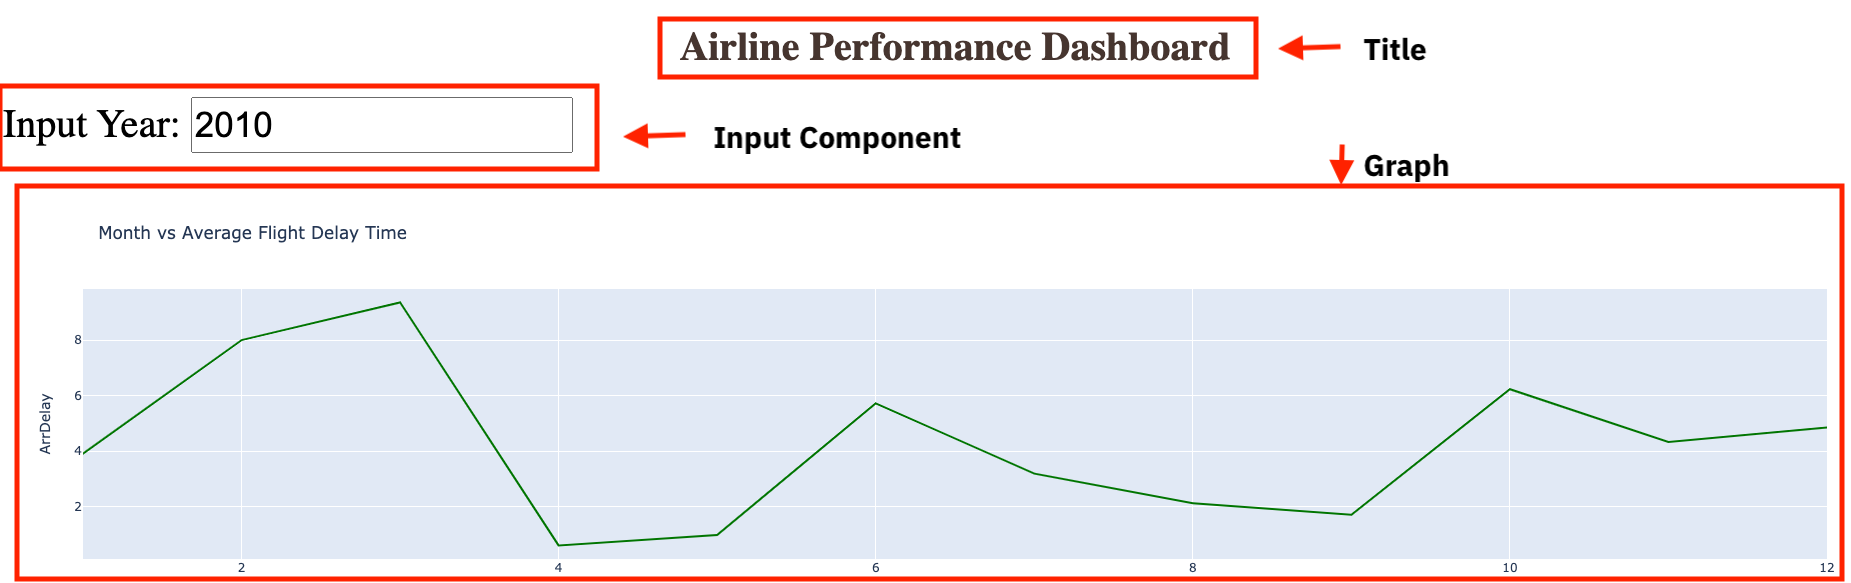

### Tasks To do:
1. Task 1
   - Import required libraries
   - Read the dataset
2. Task 2
   - Create an application layout
   - Add title to the dashboard application using HTML H1 component
3. Task 3
   - Add input text box using core input and output components
   - Add the callback decorator and generate the line chart within the callback function.
4. Task 4
   - Practice Exercise

## Get the tool ready
- Install python packages required to run the application. Copy and paste the below command to the terminal.
  `python3.8 -m pip install packaging` <br>
  `python3.8 -m pip install pandas dash` <br>
  `pip3 install httpx==0.20 dash plotly` <br>

- Create a new python script, by clicking on the side tool bar explorer icon and selecting new file icon, as shown in the image below.

    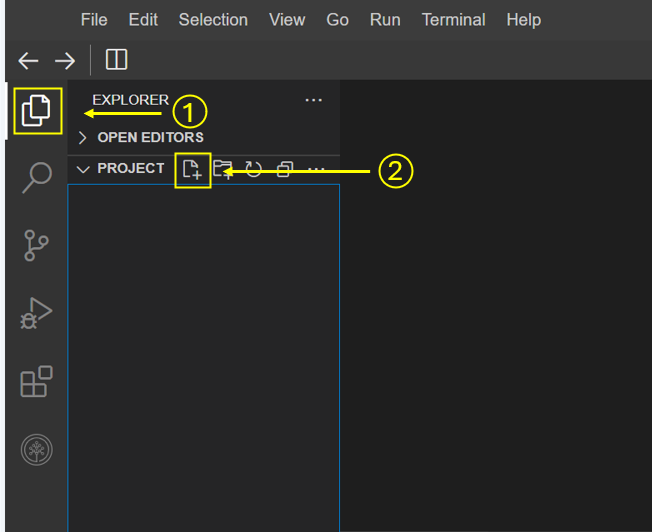

- Provide the file name as `dash_interactivity.py`

    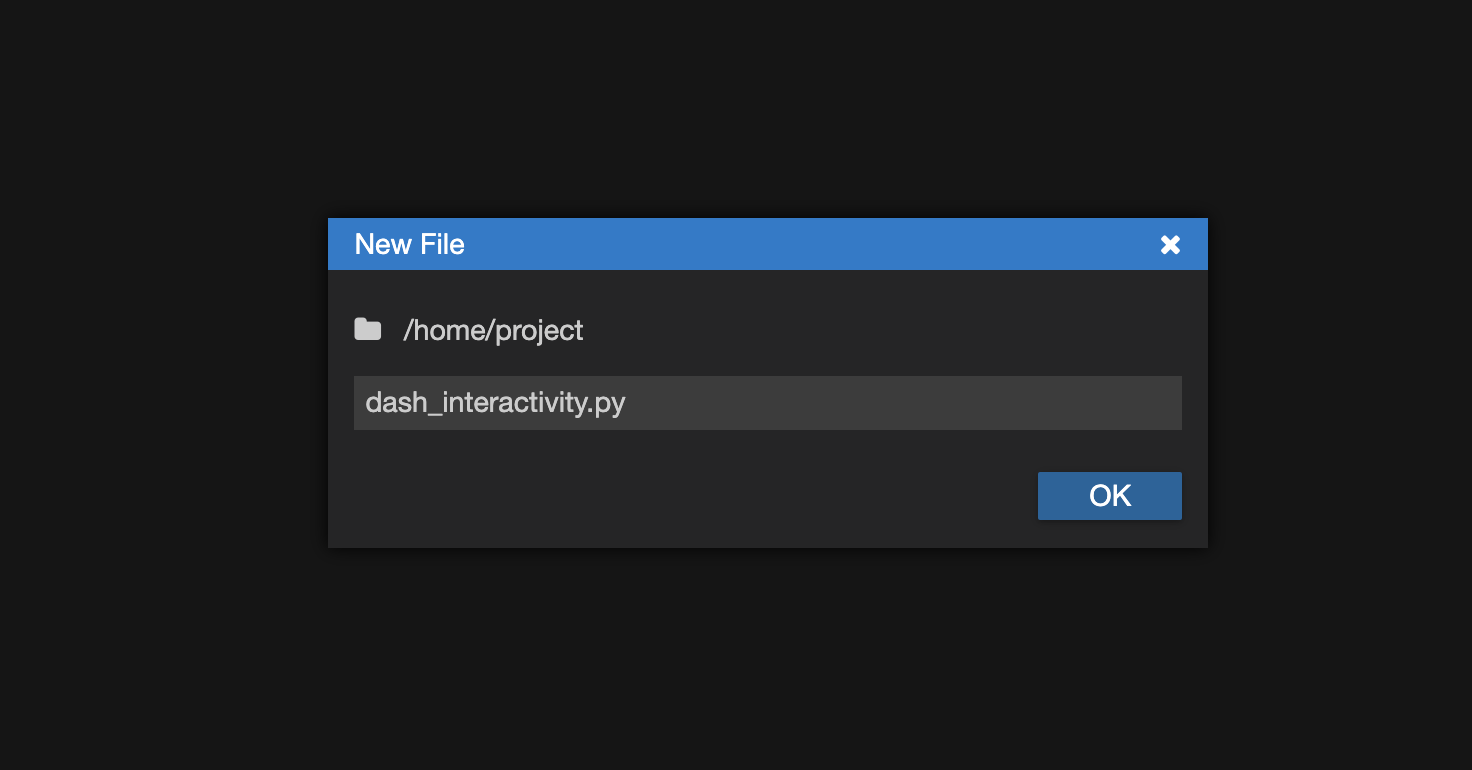

- Open a new terminal by clicking on the menu bar and selecting Terminal->New Terminal, as in the image below.

    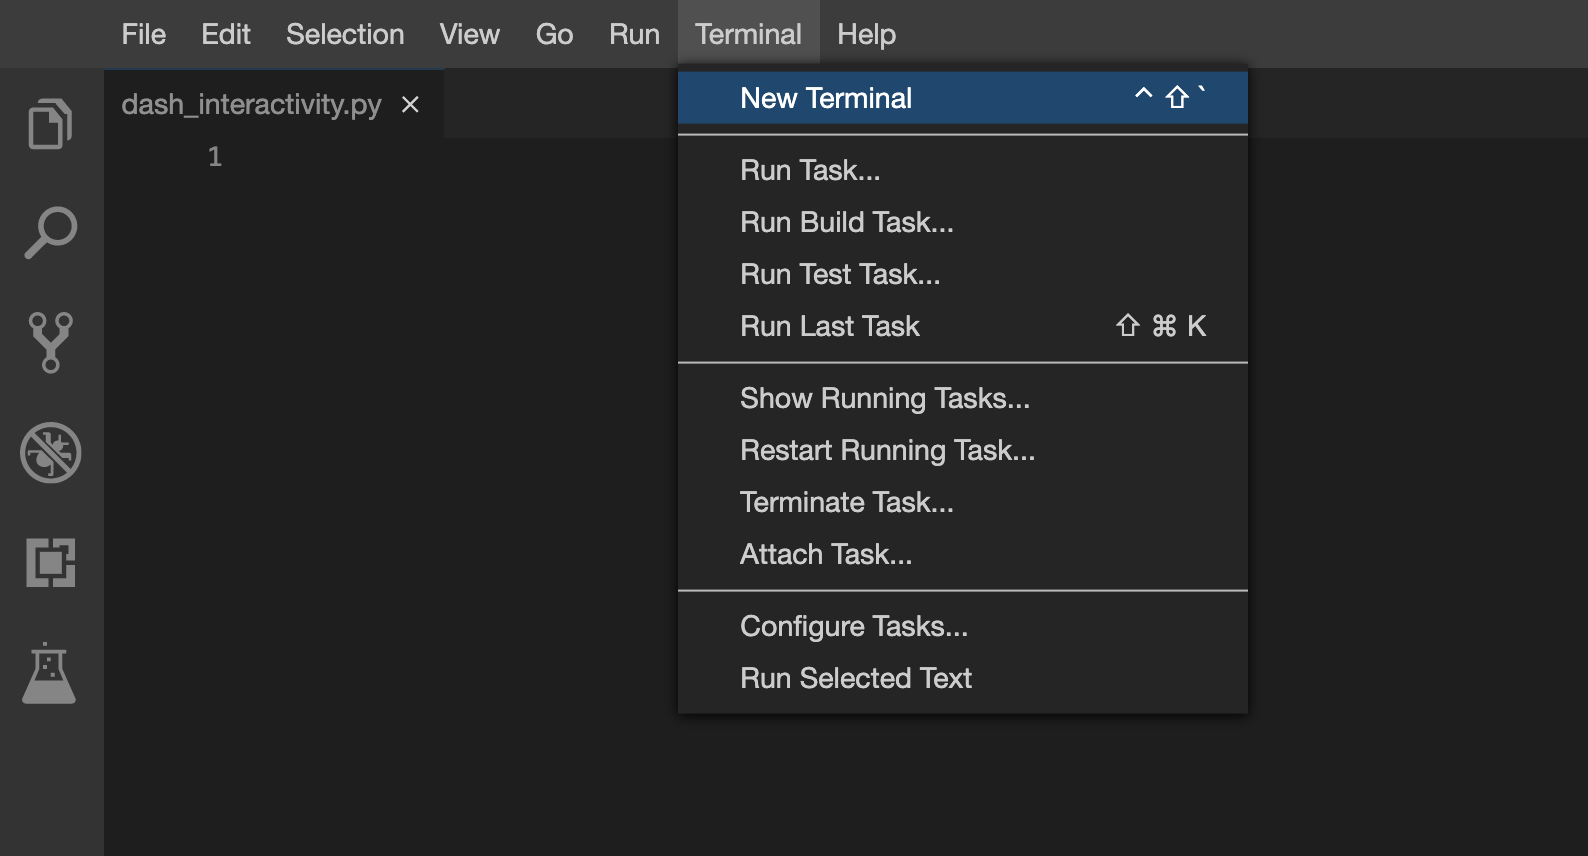

- Now, you have script and terminal ready to start the lab.

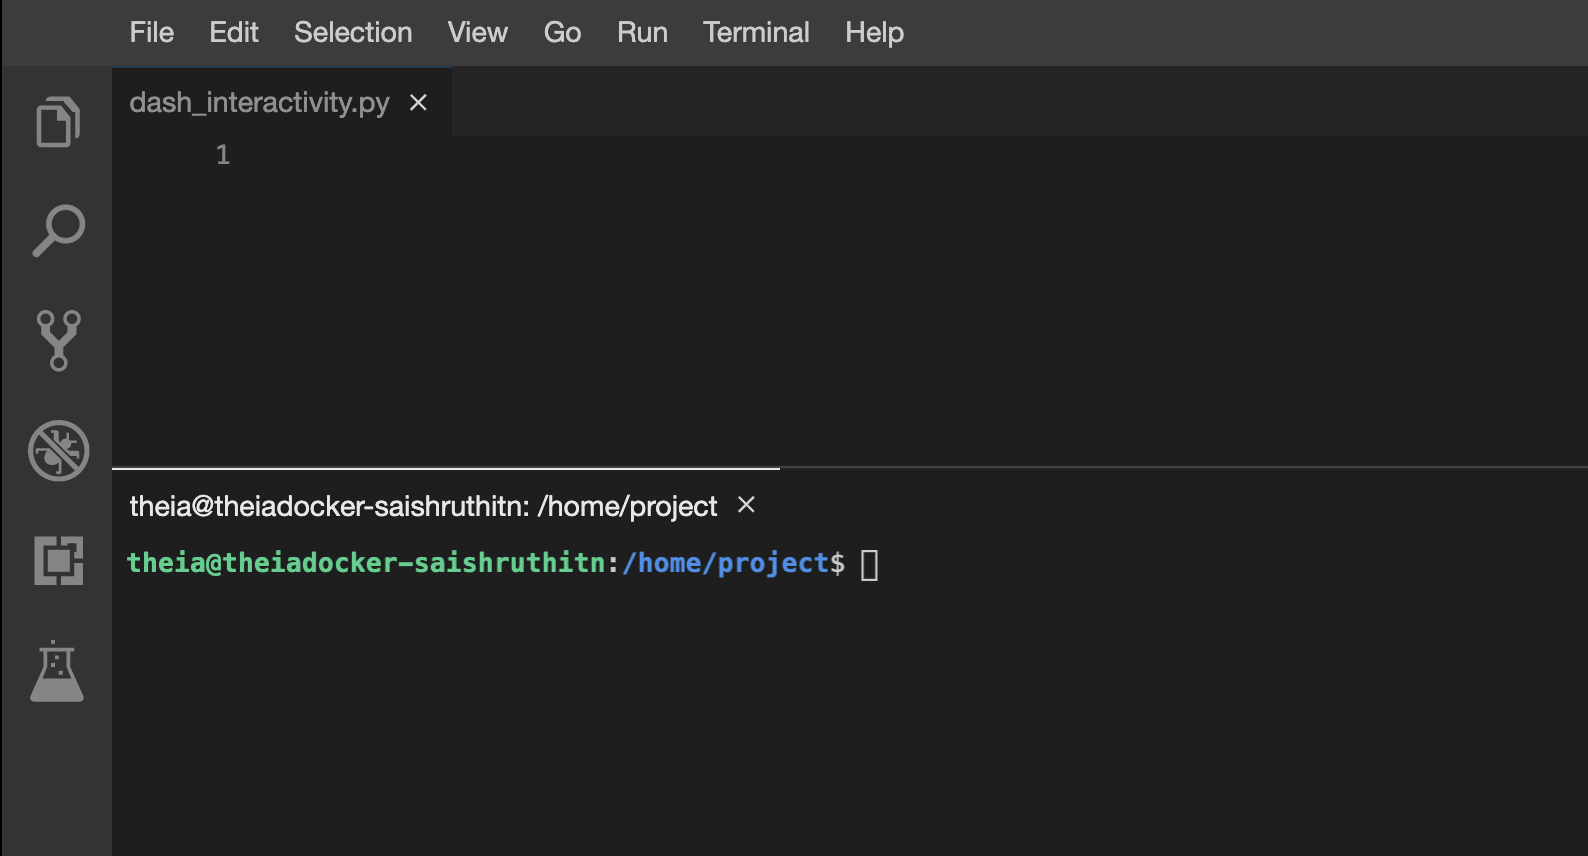

## TASK 1 - Read the data

Here you will be:

- Importing necessary libraries
- Reading the data from a CSV file

In this exercise we require the following libraries :

- pandas
- plotly
- dash
- dash_html_components
- dash_core_components
- dash.dependencies

We will first import these libraries

import pandas as pd <br>
import plotly.graph_objects as go <br>
import dash <br>
from dash import dcc <br>
from dash import html <br>
from dash.dependencies import Input, Output <br>

Now we will read the dataset using the `pd.read_csv()` function.

airline_data =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv',<br> 
                            encoding = "ISO-8859-1",<br>
                            dtype={'Div1Airport': str, 'Div1TailNum': str, <br>
                                   'Div2Airport': str, 'Div2TailNum': str})<br>

- The above code reads a CSV file called airline_data.csv from a URL using pandas, a popular data analysis library in Python.
- The file is encoded using `ISO-8859-1 character encoding`, which is a standard way of representing characters in the file.
- We defined data type of specific columns such as `(Div1Airport, Div1TailNum, Div2Airport, and Div2TailNum)` to be strings, which ensures that these columns are read as text instead of numbers.
- The resulting data is stored in a pandas dataframe object called `airline_data`, which can be used for further analysis.

Copy the below code to the `dash_interactivity.py` script and review the code.

***Import required libraries***
import pandas as pd<br>
import plotly.graph_objects as go<br>
import dash<br>
from dash import dcc<br>
from dash import html<br>
from dash.dependencies import Input, Output<br>

***Read the airline data into the pandas dataframe*** <br>
airline_data =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv',<br> 
                            encoding = "ISO-8859-1",<br>
                            dtype={'Div1Airport': str, 'Div1TailNum': str, <br>
                                   'Div2Airport': str, 'Div2TailNum': str})<br>

Now save and run this code.

Copy and paste the below command in the terminal to run the code.

`python3.11 dash_interactivity.py`

After running the above code you can see the below-expected output:

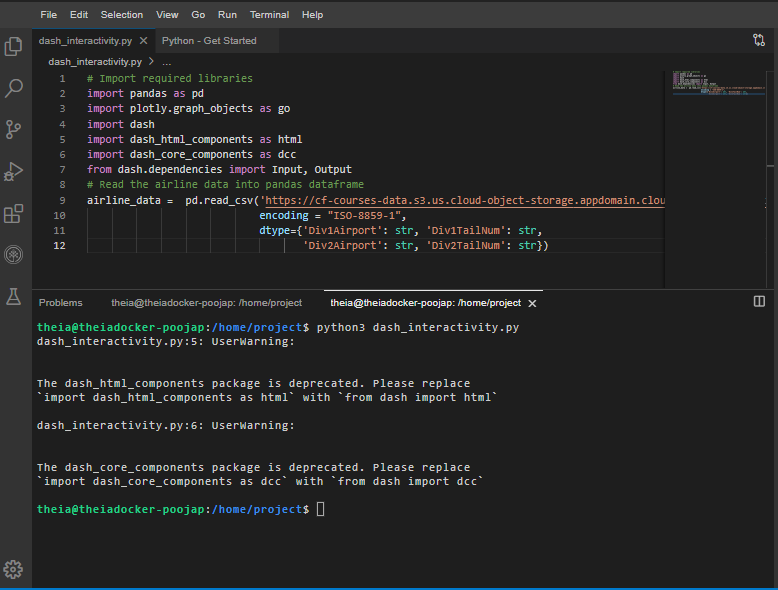

## TASK 2 - Create dash application and get the layout
Next, we create a skeleton for our dash application. Overall this layout creates a simple container with a heading, an input field, and some empty space.

In the upcoming tasks, you can modify and add new components and styles to the basic layout provided. This will allow you to customize and enhance the user interface of your Dash app to meet your specific needs and requirements as follows:

- First we will define an application `app.layout`.
- Create a heading using `html.h1()` and add style information within the divison `html.Div()`.
- create a inner division using `html.Div()` function for adding input and output components such as: 
  - Input: `label`, dropdown `input-year` and style parameters
  - Output: type of Graph `line-plot`

***Create a dash application layout***<br>
app = dash.Dash(__name__)

***Get the layout of the application and adjust it.*** <br>
***Create an outer division using html.Div and add title to the dashboard using html.H1 component*** <br>
***Add a html.Div and core input text component*** <br>
***Finally, add graph component.*** <br>
app.layout = html.Div(children=[html.H1(),<br>
                                html.Div(["Input Year", dcc.Input(),], <br>
                                style={}),<br>
                                html.Br(),<br>
                                html.Br(),<br>
                                html.Div(),<br>
                                ])<br>

## Mapping to the respective Dash HTML tags:
### Application title add using html.H1() tag
- Heading reference: [Plotly H1 HTML Component](https://dash.plotly.com/dash-html-components/h1)
- Title as `Airline Performance Dashboard`
- Use `style` parameter for the title and make it `center` aligned, with color code `#503D36`, and font-size as `40`. Check `More about HTML` section here.

NOTE: After adding the components, you code will look like the below code.(You can copy dash application code to `dash_interactivity.py` script and run)

***Import required libraries***<br>
import pandas as pd<br>
import plotly.graph_objects as go<br>
import dash<br>
from dash import dcc<br>
from dash import html<br>
from dash.dependencies import Input, Output<br>
***Read the airline data into pandas dataframe***
airline_data =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv', <br>
                            encoding = "ISO-8859-1",<br>
                            dtype={'Div1Airport': str, 'Div1TailNum': str, <br>
                                   'Div2Airport': str, 'Div2TailNum': str})<br>
                                   
***Create a dash application***<br>
app = dash.Dash(__name__)

app.layout = html.Div(children=[html.H1('Airline Performance Dashboard',style={'textAlign': 'center', 'color': '#503D36', 'font-size': 40}),<br>
                                html.Div(["Input Year", dcc.Input(),], <br>
                                style={}),<br>
                                html.Br(),<br>
                                html.Br(),<br>
                                html.Div(),<br>
                                ])<br>

***Run the app***<br>
if __name__ == '__main__':<br>
    app.run_server()

### To run the Dash app follow the below steps
- First, install pandas and dash using the following command in the terminal
  `pip3.8 install pandas dash`
  
- Copy and paste the below command in the terminal to run the application.
  `python3.8 dash_interactivity.py`

- Observe the port number shown in the terminal.
  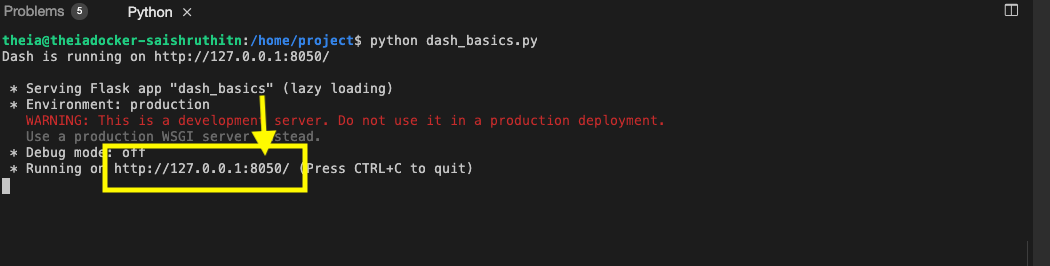

- Click on the Launch Application option from the side menu bar.Provide the port number and click OK

The app will open in a new browser tab like below:

After running the above code, launch the app in a new tab and below is the expected result from the code:

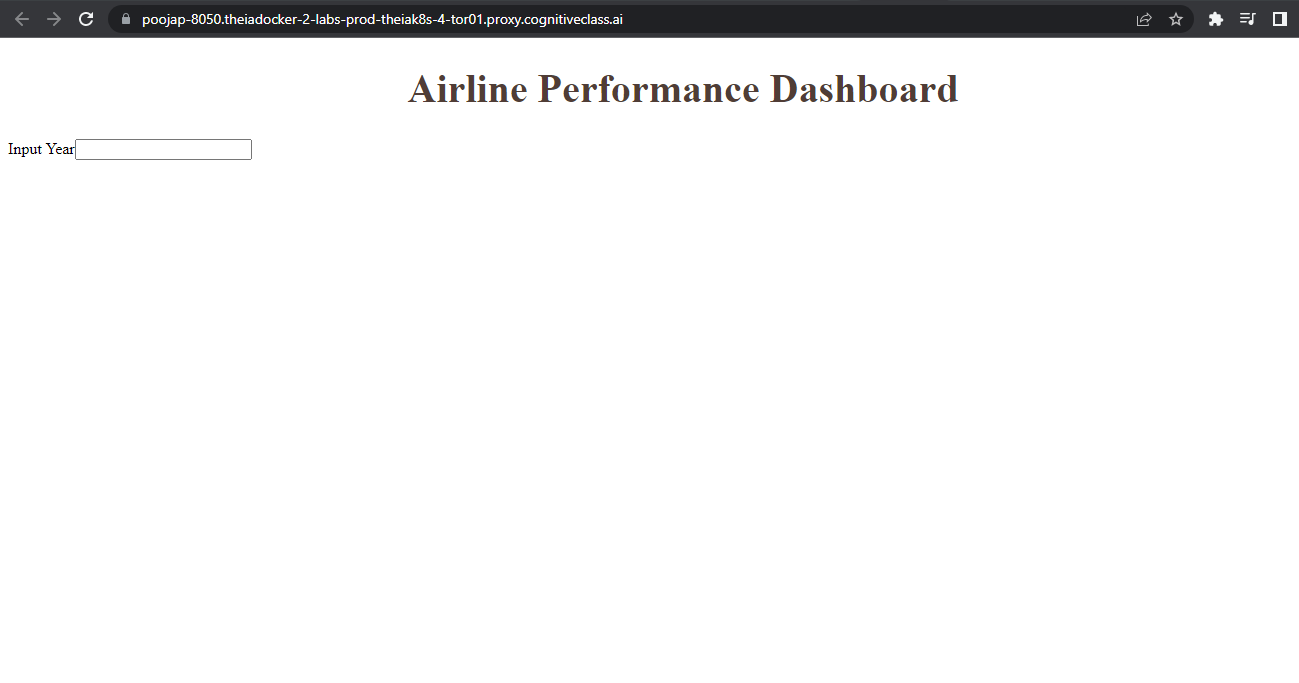

## Input and Output components of layout
### Inut component
- As our input is a dropdown showing a list of years we will use the [dcc.Input()](https://dash.plotly.com/dash-core-components/input) function. We define the following parameters
  - `id`: `input-year`, which is a unique identifier for this specific input field. The default `value` for this input field will be set to `2010`, and the type of `input` will be a `number`.
- `style` parameter for the dropdown: Here within it we define `height of the input box to be` 50px `and font-size to be` 35` to make the text larger and more readable.
- `style` parameter for the whole division: Now assign `font-size` as `40`.

### Output component
- Add `dcc.Graph()` component to the second division.
- Update [dcc.Graph](https://dash.plotly.com/dash-core-components/graph) component `id` as `line-plot`.

NOTE: After adding the componenets you code will look like below code.(You can copy dash application code to `dash_interactivity.py` script and run).

To terminate a currently running program in the Python terminal (also known as the Python REPL), you can use the KeyboardInterrupt shortcut. This can be done by pressing the CTRL and C keys simultaneously.

***Import required libraries***<br>
import pandas as pd<br>
import plotly.graph_objects as go<br>
import dash<br>
from dash import dcc<br>
from dash import html<br>
from dash.dependencies import Input, Output<br>
***Read the airline data into pandas dataframe***<br>
airline_data =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv', <br>
                            encoding = "ISO-8859-1",<br>
                            dtype={'Div1Airport': str, 'Div1TailNum': str, <br>
                                   'Div2Airport': str, 'Div2TailNum': str})<br>
***Create a dash application***<br>
app = dash.Dash(__name__)<br>
                               
app.layout = html.Div(children=[ html.H1('Airline Performance Dashboard',style={'textAlign': 'center', 'color': '#503D36', 'font-size': 40}),<br>
                                html.Div(["Input Year: ", dcc.Input(id='input-year', value='2010', <br>
                                type='number', style={'height':'50px', 'font-size': 35}),], <br>
                                style={'font-size': 40}),<br>
                                html.Br(),<br>
                                html.Br(),<br>
                                html.Div(dcc.Graph(id='line-plot')),<br>
                                ])<br>

***Run the app***<br>
if __name__ == '__main__':<br>
    app.run_server()

After running the above code, launch the app in a new tab and below is the expected result from the code:

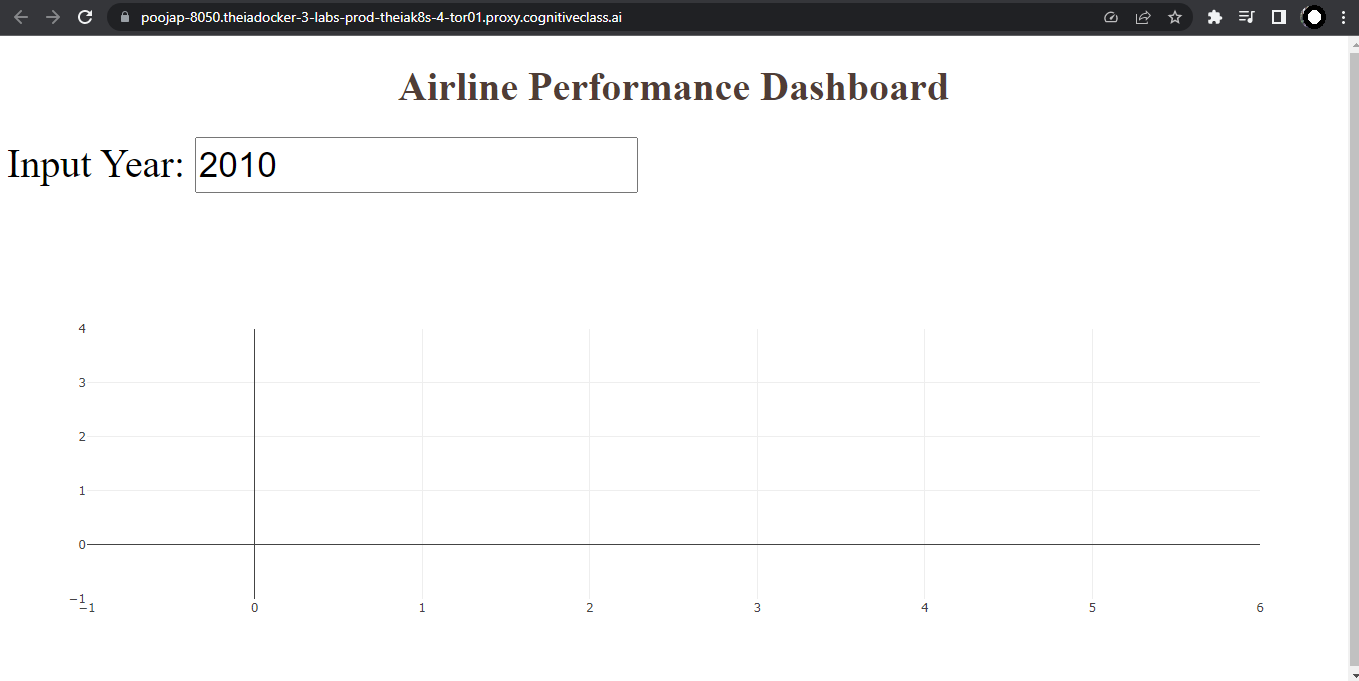

## TASK 3 - Add the application callback function
### Callback
In Python, **@app.callback** is a decorator used in the Dash framework to specify that a function should be called when an input component changes its value.The Input and Output functions are used to define the inputs and outputs of a callback function.

The core idea of this application is to get year as `user input`(input function) and update the dashboard(output function) in real-time with the help of `callback` function.

Steps:

- Define the callback decorator.
- Define the callback function that uses the input provided to perform the computation.
- Create graph and return it as an output.

The below code is base structure for calback decorator and function graph.

***add callback decorator***<br>
@app.callback(Output(),<br>
               Input())<br>

***Add computation to callback function and return graph***<br>
def get_graph(entered_year):<br>
    ***Select data based on the entered year***<br>
    df =  airline_data[airline_data['Year']==int(entered_year)]<br>
    
    Group the data by Month and compute the average over arrival delay time.
    
    line_data = df.groupby('Month')['ArrDelay'].mean().reset_index()
     
    fig = go.Figure(data=)
    fig.update_layout()
    return fig

***Run the app***<br>
if __name__ == '__main__':<br>
    app.run_server()



## Update the callback function
### Callback decorator
- Refer to examples provided [here](https://dash.plotly.com/basic-callbacks)
- `Input()` function takes two parameters:
  - `component-id` with the value `input-year`, which is the ID of the input dropdown.
  - `component_property` being accessed is the `value` property, which represents the year entered by the user.
- `Output()` function takes two parameters:
  - `component-id` with the value `line-plot`, which is the id of the output.
  - `component_property` being modified is the `figure` property, which specifies the data and layout of the line plot.

### Callback function
Update `data` parameter of the `go.Figure()` with the scatter plot. Refer here. Sample syntax below:<br>
go.Scatter(x='----', y='----', mode='-----', marker='----)<br>

In the go.Scatter() update the parameter as below:
- Update x as `line_data['Month']`
- Update y as `line_data['ArrDelay']`
- Update `mode` as `lines`, and `marker` as `dict(color='green')`
- Update `fig.update_layout` with title, xaxis_title, and yaxis_title parameters.
  - Title as `Month vs Average Flight Delay Time`.
  - `xaxis_title` as `Month`
  - `yaxis_title` as `ArrDelay`

Refer the updated layout function [here](https://plotly.com/python/line-and-scatter/#style-scatter-plots).
Refer to the full python code of `dash_interactivity.py` below:<br>
***Import required libraries***<br>
import pandas as pd<br>
import plotly.graph_objects as go<br>
import dash<br>
from dash import dcc<br>
from dash import html<br>
from dash.dependencies import Input, Output<br>

***Read the airline data into the pandas dataframe***<br>
airline_data =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv', <br>
                            encoding = "ISO-8859-1",<br>
                            dtype={'Div1Airport': str, 'Div1TailNum': str, <br>
                                   'Div2Airport': str, 'Div2TailNum': str})<br>
***Create a dash application***<br>
app = dash.Dash(__name__)
                               
app.layout = html.Div(children=[ html.H1('Airline Performance Dashboard',style={'textAlign': 'center', 'color': '#503D36', 'font-size': 40}),<br>
                                html.Div(["Input Year: ", dcc.Input(id='input-year', value='2010',<br> 
                                type='number', style={'height':'50px', 'font-size': 35}),], <br>
                                style={'font-size': 40}),<br>
                                html.Br(),<br>
                                html.Br(),<br>
                                html.Div(dcc.Graph(id='line-plot')),<br>
                                ])<br>

***add callback decorator***<br>
@app.callback( Output(component_id='line-plot', component_property='figure'),<br>
               Input(component_id='input-year', component_property='value'))<br>

***Add computation to callback function and return graph***<br>
def get_graph(entered_year):<br>
    Select 2019 data<br>
    df =  airline_data[airline_data['Year']==int(entered_year)]
    
    Group the data by Month and compute average over arrival delay time.
    line_data = df.groupby('Month')['ArrDelay'].mean().reset_index()

    fig = go.Figure(data=go.Scatter(x=line_data['Month'], y=line_data['ArrDelay'], mode='lines', marker=dict(color='green')))
    fig.update_layout(title='Month vs Average Flight Delay Time', xaxis_title='Month', yaxis_title='ArrDelay')
    return fig

***Run the app***<br>
if __name__ == '__main__':
    app.run_server()

After running the above code, launch the app in a new tab and below is the expected final result from the code:

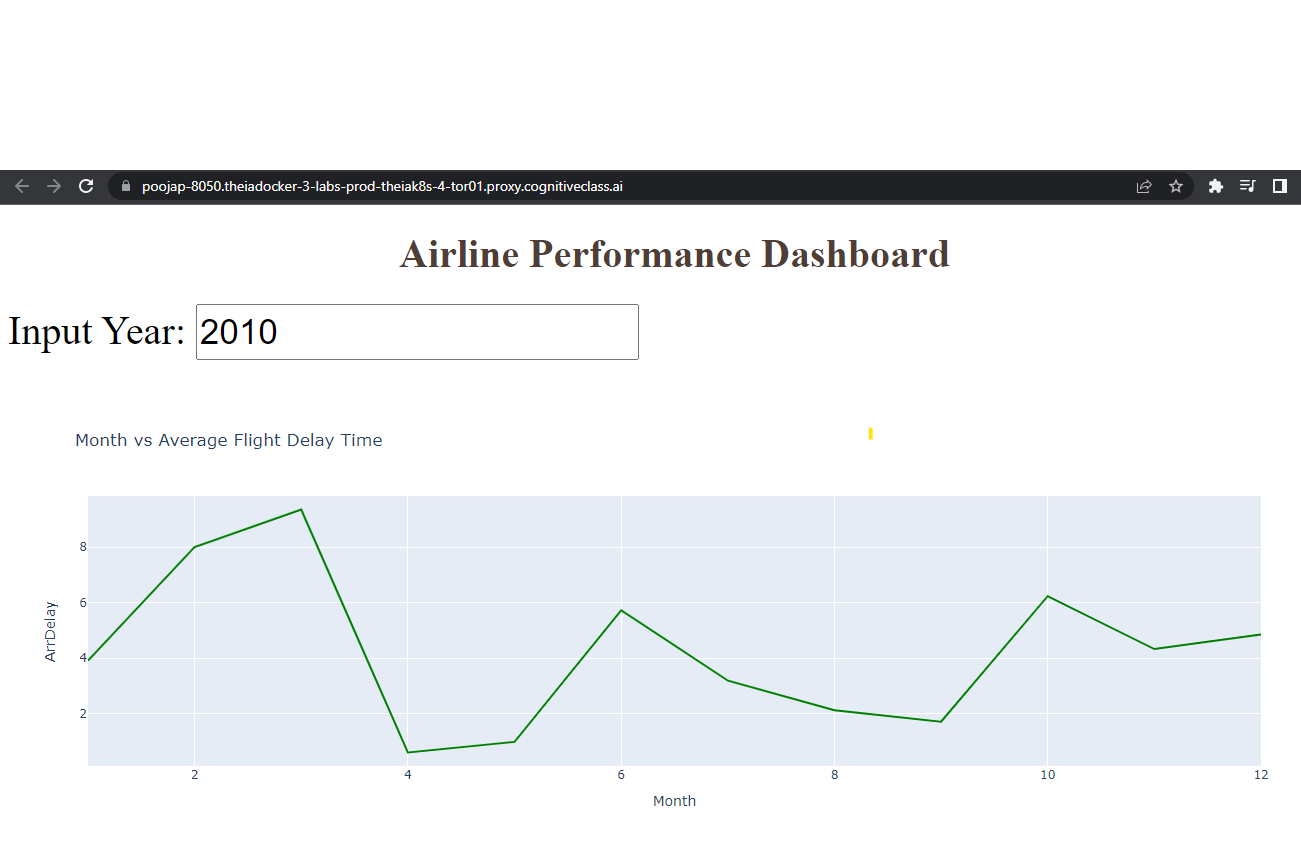

## TASK 4 : Practice Exercise
### You will practice some tasks to create the new dashboard.
Note: Please refer the Bar chart exercise of [Plotly basics: scatter, line, bar, bubble, histogram, pie, sunburst](https://www.coursera.org/learn/python-for-data-visualization/ungradedLti/OrxCy/plotly-basics-scatter-line-bar-bubble-histogram-pie-sunburst) lab for this exercise.

### Theme
Let us use a bar chart to extract the number of flights from a specific airline that goes to a destination.

### Expected Output
Below is the expected result from the lab. Our dashboard application consists of three components:

- Title of the application
- Component to enter input year
- A chart conveying Total number of flights to the destination state.

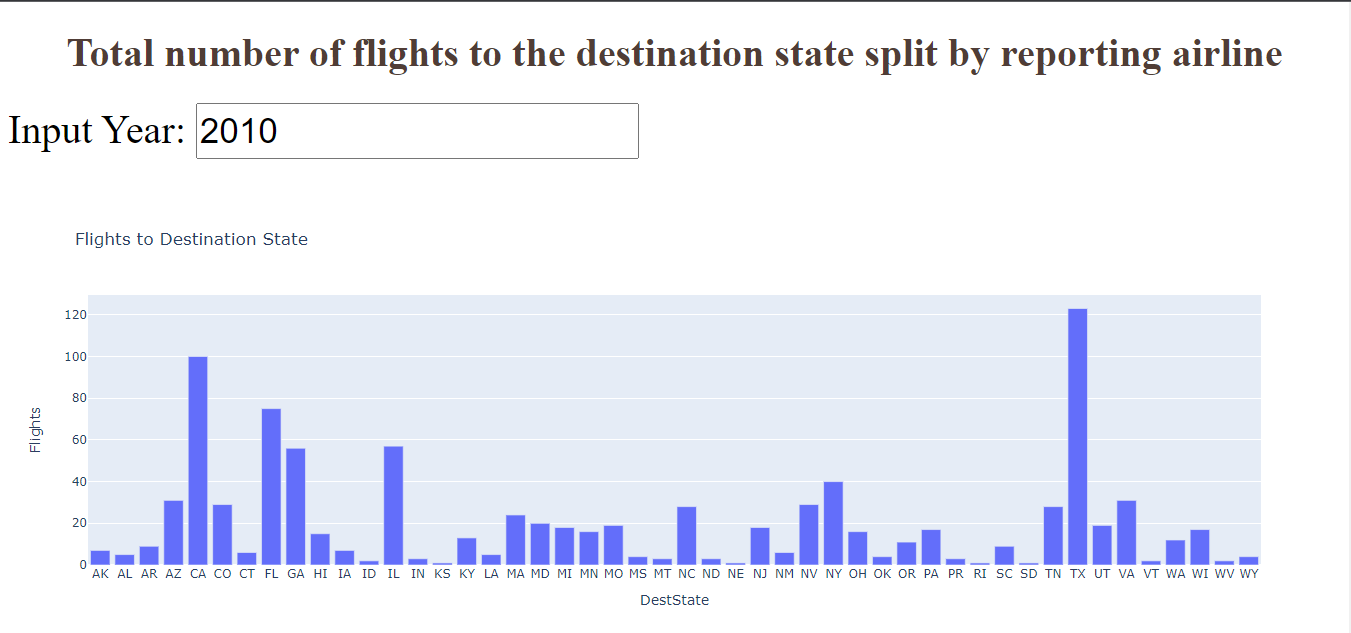

Create a new python script and provide the file name as `dash_interactivity_barplot.py`.

1. Import all the required libraries and read the Airline Reporting Carrier On-Time Performance dataset.
   ***Import required libraries***<br>
   import pandas as pd<br>
   import plotly.graph_objects as go<br>
   import plotly.express as px<br>
   import dash<br>
   from dash import dcc<br>
   from dash import html<br>
   from dash.dependencies import Input, Output<br>
***Read the airline data into pandas dataframe***<br>
airline_data =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv', <br>
                       encoding = "ISO-8859-1",<br>
                       dtype={'Div1Airport': str, 'Div1TailNum': str, <br>
                              'Div2Airport': str, 'Div2TailNum': str})<br>

2. Give the title to the dashboard to “Total number of flights to the destination state split by reporting air” using HTML H1 component and font-size as 50.
   - Input component Make changes to a component called dcc.Input in a tool called Dash. We are updating its id to be input-year, which is a unique identifier for this specific input field. The default value for this input field will be set to 2010, and the type of input will be a number.
   - To make the text larger and more readable, use the style parameter and assign the height of the input box to 50px and font-size to be 35. Use style parameter again and assign font-size of 40 for the whole division
   - Output componentAdd dcc.Graph() component to the second division. Update dcc.Graph component id as bar-plot.

   app = dash.Dash(__name__)<br>
   app.layout = html.Div(children=[ html.H1('Total number of flights to the destination state split by reporting airline',<br>
                              style={'textAlign': 'center', 'color': '#503D36', 'font-size': 40}),<br>
                              html.Div(["Input Year: ", dcc. Input(id='input-year',value='2010',<br>
                              type='number', style={'height':'50px', 'font-size': 35}),], <br>
                              style={'font-size': 40}),html.Br(), html.Br(),<br>
                              html.Div(dcc.Graph(id='bar-plot')),]) <br>

3. Add Callback decorator
- Update output component id parameter with bar-plot same as the id provided in the dcc.Graph() component and component property as figure.
- Update input component id parameter with input-year same as the id provided in the dcc.Input() component and component property as value.
       Use style parameter and assign font-size as 35 for the whole division.
       @app.callback( Output(component_id='bar-plot',component_property='figure'),<br>
             Input(component_id='input-year', component_property='value'))
4. Define Callback graph function
- Group the data by destination state and reporting airline. Compute the total number of flights in each combination
- Use plotly express bar chart function px.bar. Provide input data, x and y axis variables, and a chart title. This will give the total number of flights to the destination state.
  def get_graph(entered_year):<br>
    df =  airline_data[airline_data['Year']==int(entered_year)]<br>
    bar_data = df.groupby('DestState')['Flights'].sum().reset_index()<br>
    fig = px.bar(bar_data, x= "DestState", y= "Flights", title='Total number of flights to the destination state split by reporting airline') <br>
    fig.update_layout(title='Flights to Destination State', xaxis_title='DestState', yaxis_title='Flights')<br>
    return fig

5. Add the code for running the app, save the above changes, and relaunch the dashboard application to see the new dashboard.
   if __name__ == '__main__':<br>
    app.run_server() 